In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
from IPython import display
from utils import plot_decision_boundary
from sklearn.base import BaseEstimator

# Logistic regression


Consider we have a binary classification problem. Say we have a set of training examples $(X_i, y_i), i=1..N$, where :

- $X_i$ is a vector of features of size J
- $y_i=0..1$ is the class of the ith example

Let's load an example dataset from scikit-learn:

In [12]:
from sklearn.datasets import load_digits
data = load_digits(2)
X, y = data["data"], data["target"]
N, J = X.shape

In [13]:
print(X.shape)
print(y.shape)
print("number of examples(N) : {0}".format(N))
print("number of features(J): {0}".format(J))

(360, 64)
(360,)
number of examples(N) : 360
number of features(J): 64


In [14]:
print(y)
print("number of ones : {0}".format(y.sum()))
print("number of zeros : {0}".format((1 - y).sum()))

[0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1
 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0
 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0]
number of ones : 182
number of zeros : 178


The logistic regression is a linear model for classification.
Say x is an example, that is, a vector of size J and we want to compute the prediction, then :

$p(y=1|x) = \sigma(\sum_{j=1}^J x_j w_j + b)$

where $ \sigma(a) = \frac{1}{1 + exp(-a)}$

and:

if $p(y=1|x) > 0.5$ we predict 1, else we predict 0

The goal is learn  the values for $w$ and $b$ from data to minimize [cross entropy](https://en.wikipedia.org/wiki/Cross_entropy), a way to evaluate the difference between what we predict and the "truth", assuming y given x follows a bernoulli probability distribution.

Let's try it.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, train_test_split

In [16]:
clf = LogisticRegression()
# splitting train/test
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf.fit(X_train, y_train)
# accuracy on test set
print((clf.predict(X_test)==y_test).mean())

# outputting the parameters
b = clf.intercept_[0]
w = clf.coef_[0]

print("b : {0}".format(b))
print("w : {0}".format(w))

1.0
b : 0.00328659736356
w : [  0.00000000e+00  -1.23993701e-03   9.23627049e-03  -7.82924932e-02
  -2.22287277e-02   1.61169953e-01   5.11503527e-02   0.00000000e+00
   0.00000000e+00  -1.09758814e-02  -2.48320725e-02  -2.30853549e-02
   7.33918318e-02   1.05787448e-02   1.84804850e-02   0.00000000e+00
   6.48503054e-03   5.79535861e-02   5.82580150e-03   1.65378603e-01
   2.14877059e-01  -6.04304253e-02  -8.61093870e-03   0.00000000e+00
   3.24251527e-03   2.31724138e-02  -1.69214980e-02   1.50752008e-01
   1.85585048e-01  -5.71715753e-02  -6.03800689e-02   0.00000000e+00
   0.00000000e+00  -5.60437341e-02  -9.75448975e-02   1.31642036e-01
   1.42022063e-01  -5.68339577e-02  -7.74851453e-02   0.00000000e+00
   0.00000000e+00  -4.03156785e-02  -1.45263959e-01   1.11551456e-01
   6.92223359e-02  -8.48376703e-02  -6.70525857e-02   0.00000000e+00
   0.00000000e+00  -9.05519519e-03  -1.23763865e-01  -4.85035394e-02
  -6.19581400e-02  -5.85740209e-02   1.78696762e-02   1.11573342e-02
   0.

Let's visualize what logistic regression does for a 2D problem

In [17]:
from sklearn.datasets import make_blobs

In [18]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,
                  random_state=0)

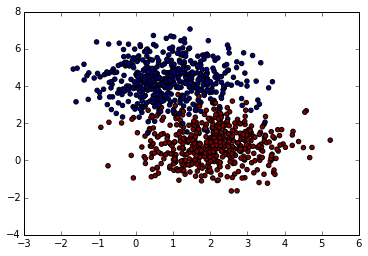

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')

This problem is linearly separable so logistic regression works well, here is the decision boundary:

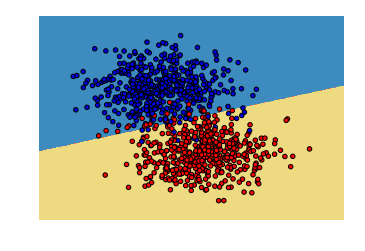

In [20]:
clf = LogisticRegression()
clf.fit(X, y)
plot_decision_boundary(clf, X, y)

What happens if the problem is not linearly separable ?

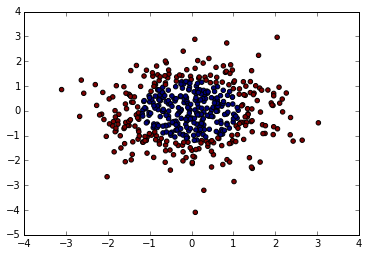

In [21]:
from sklearn.datasets import make_gaussian_quantiles
X, y = make_gaussian_quantiles(n_samples=500, n_features=2, n_classes=2)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

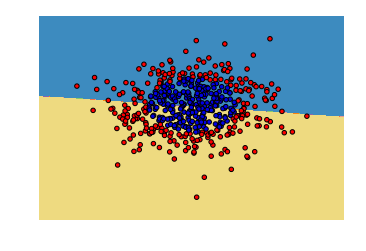

In [22]:
clf = LogisticRegression()
clf.fit(X, y)
plot_decision_boundary(clf, X, y)

How do we solve that ? we can project our features in a feature space of higher dimension and then apply logistic regression on the new feature space.

The model becomes:

$p(y=1|x) = \sigma(\sum_{j=1}^J \Phi_j(x) w_j + b)$

where $\Phi_j(x)$ is the j-th feature in the new feature space.

how do we choose the features in the new space, we have a variety of possbilities.
We can for instance use polynomial expansions where we fix the maximum degree to
some number, P.

Let's try $P=2$.

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [24]:
pipeline = make_pipeline(
    PolynomialFeatures(degree=2, interaction_only=False, include_bias=False),
    LogisticRegression()
)

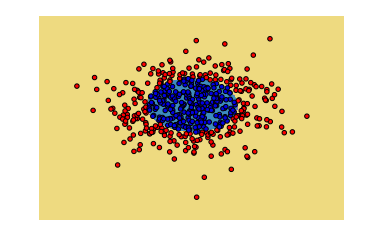

In [25]:
pipeline.fit(X, y)
plot_decision_boundary(pipeline, X, y)

The problem of this approach is that it is problem dependent, there is no reason why
polynomial expansions would work for any problem. 

For each problem, we have to design a feature space which makes the problem
linearly separable or at least easier, this part of the process is 
called **feature engineering** and it is a difficult problem.

Is there a way to automatically learn that feature space from the data ?
this is what deep learning is about, learning $\Phi$ from data.